# Step 4 Exploring Data

In [1]:
import pandas as pd
mcD=pd.read_csv('mcdonalds.csv')

In [2]:
mcD.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [3]:
mcD.shape

(1453, 15)

In [4]:
mcD.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [5]:
import numpy as np
# Extract columns 0 to 11 and convert to matrix
MD_x = mcD.iloc[:,0:11].values
# convert 1 to yes and No to 0
MD_x = np.where(MD_x=="Yes",1,0)
# Calculate column means and round to 2 decimal places
col=np.round(np.mean(MD_x,axis=0),2)

In [6]:
MD_x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [7]:
col

array([0.55, 0.91, 0.09, 0.87, 0.53, 0.9 , 0.6 , 0.64, 0.36, 0.2 , 0.24])

In [8]:
from sklearn.decomposition import PCA

# perform PCA
pca=PCA()
md_pca=pca.fit_transform(MD_x)

In [9]:
summary={
    "Standard deviations": pca.explained_variance_,
    "Proportion of variance": pca.explained_variance_ratio_,
    "Cumulative proportion": pca.explained_variance_ratio_.cumsum()
}

In [10]:
# print the summary
for key, value in summary.items():
    print(key+":")
    print(value)

Standard deviations:
[0.57312398 0.36900226 0.2546408  0.15904032 0.11384214 0.09627033
 0.08392454 0.07569209 0.07035814 0.06192225 0.05612296]
Proportion of variance:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative proportion:
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [11]:
# create the dataframe
pca_df = pd.DataFrame(data=md_pca, columns=["PC{}".format(i + 1) for i in range(pca.n_components_)])
print(pca_df.round(1))

      PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11
0     0.4 -0.2  0.7 -0.4  0.2 -0.4 -0.2  0.2  0.2   0.5  -0.6
1    -0.2  0.4 -0.7 -0.1  0.0 -0.1 -0.1 -0.0  0.1   0.5  -0.5
2     0.4  0.7 -0.1  0.7  0.8 -0.7  0.6  0.4 -0.3   0.1   0.2
3    -0.2 -0.4 -0.8  0.2 -0.7 -0.0 -0.1 -0.2 -0.0  -0.3  -0.1
4     0.2 -0.8  0.0  0.5  0.9 -0.1 -0.5  0.2 -0.1   0.0   0.1
...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...
1448  1.6  0.3 -0.0  0.2 -0.1  0.3 -0.1  0.3 -0.1  -0.4  -0.5
1449 -1.0  0.0  0.3  0.4 -0.1  0.4 -0.3  0.9 -0.3  -0.2  -0.2
1450 -0.2  1.1  0.2 -0.5 -0.2 -0.2 -0.1 -0.0  0.0   0.1  -0.0
1451 -1.2 -0.0  0.6  0.7  0.0  0.2 -0.0 -0.3  0.0  -0.0  -0.1
1452  1.6  0.3 -0.0  0.2 -0.1  0.3 -0.1  0.3 -0.1  -0.4  -0.5

[1453 rows x 11 columns]


In [12]:
rotation_matrix = pd.DataFrame(data=pca.components_,columns=["PC{}".format(i+1) for i in range(pca.n_components_)])
print(rotation_matrix.round(1))

    PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11
0  -0.5 -0.2 -0.0  0.1  0.3 -0.1 -0.3 -0.5  0.3  -0.2   0.4
1   0.4  0.0  0.0 -0.0 -0.1 -0.1 -0.6  0.3  0.6   0.1  -0.1
2  -0.3 -0.1 -0.0 -0.3 -0.8 -0.1 -0.1 -0.3  0.0   0.2  -0.1
3   0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.0  0.1   0.8   0.4
4  -0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.0   0.3  -0.7
5   0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3  -0.2  -0.2
6  -0.3 -0.1  0.7 -0.4  0.0 -0.1 -0.0  0.4 -0.1  -0.3  -0.0
7   0.0 -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.0   0.2  -0.2
8   0.6 -0.0  0.4 -0.2 -0.0  0.2  0.1 -0.6  0.1  -0.2  -0.1
9  -0.1 -0.7 -0.1 -0.0  0.0  0.2  0.4  0.1  0.5  -0.0  -0.3
10  0.0 -0.5  0.1  0.3  0.0  0.3 -0.5  0.0 -0.5   0.2  -0.0


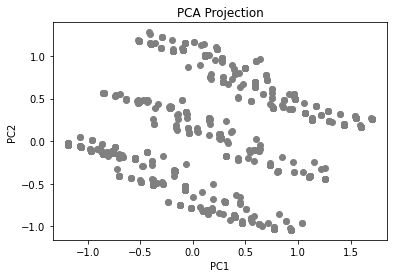

In [13]:
import matplotlib.pyplot as plt
# plot the pca
plt.scatter(md_pca[:,0],md_pca[:,1],color='grey')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection")
plt.show()

In [14]:
# get the projecction axes

proj_axes = pca.components_
proj_axes

array([[-0.47693349, -0.15533159, -0.00635636,  0.11623168,  0.3044427 ,
        -0.10849325, -0.33718593, -0.47151394,  0.32904173, -0.21371062,
         0.37475293],
       [ 0.36378978,  0.016414  ,  0.01880869, -0.03409395, -0.06383884,
        -0.0869722 , -0.61063276,  0.3073178 ,  0.60128596,  0.07659344,
        -0.13965633],
       [-0.30444402, -0.0625153 , -0.03701866, -0.32235949, -0.80237317,
        -0.06464172, -0.14931026, -0.28726479,  0.02439661,  0.19205128,
        -0.08857138],
       [ 0.0551622 , -0.14242496,  0.19761927, -0.35413876,  0.2539601 ,
        -0.09736269,  0.11895823, -0.00254696,  0.06781599,  0.76348804,
         0.36953871],
       [-0.30753507,  0.27760805,  0.07062017, -0.07340475,  0.36139895,
         0.10793025, -0.12897259, -0.21089912, -0.00312457,  0.28784553,
        -0.72920859],
       [ 0.17073819, -0.34783006, -0.3550866 , -0.40651542,  0.20934711,
        -0.59463206, -0.10324067, -0.07691443, -0.26134151, -0.17822612,
        -0.210

In [15]:
# import warnings
# warnings.filterwarnings('ignore')

# Step 5: Extracting Segments

In [16]:
# import os
# os.environ["OMP_NUM_THREADS"] = "6"


from sklearn.cluster import KMeans
from sklearn.utils import check_random_state

# Set the random seed
np.random.seed(1234)

# Perform clustering with different number of clusters and random restarts
k_range = range(2, 9)
n_rep = 10
best_labels = None
best_model = None
best_inertia = np.inf
random_state = check_random_state(1234)

for k in k_range:
    for _ in range(n_rep):
        model = KMeans(n_clusters=k, random_state=random_state)
        labels = model.fit_predict(MD_x)
        inertia = model.inertia_
        if inertia < best_inertia:
            best_inertia = inertia
            best_labels = labels
            best_model = model

# Relabel the clustering results
unique_labels = np.unique(best_labels)
relabel_map = {label: i for i, label in enumerate(unique_labels)}
best_labels_relabeled = np.array([relabel_map[label] for label in best_labels])



In [17]:
best_labels=best_labels[:12]
best_labels

array([7, 5, 5, 1, 0, 6, 3, 1, 2, 5, 0, 5])

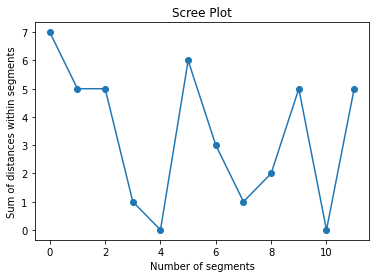

In [18]:
import seaborn as sns
plt.plot(best_labels,marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Sum of distances within segments')
plt.title('Scree Plot')
plt.show()



In [19]:
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

np.random.seed(1234)

n_segments = 7
n_rep = 10
n_boot = 100
boot_results = []


for k in range(2, n_segments + 1):
    bootstrap_samples = []
    for _ in range(n_boot):
        bootstrap_data = resample(MD_x, replace=True)
        model = KMeans(n_clusters=k, random_state=check_random_state(1234))
        labels = model.fit_predict(bootstrap_data)
        bootstrap_samples.append(labels)
    
    boot_results.append(bootstrap_samples)

# Transpose the boot_results array
boot_results_reshaped = np.array(boot_results).reshape(-1,n_segments-1)



In [20]:
boot_results_reshaped=boot_results_reshaped[2:,:7]
boot_results_reshaped

array([[0, 0, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 0],
       [1, 1, 0, 1, 1, 1],
       ...,
       [4, 0, 1, 0, 1, 3],
       [3, 3, 2, 5, 3, 1],
       [6, 3, 1, 1, 0, 2]])

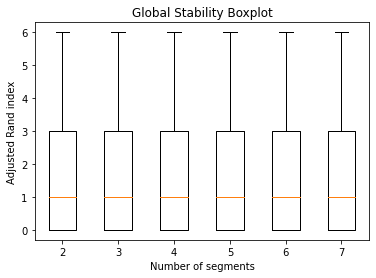

In [21]:
# Generate labels for each boxplot
labels = [str(i) for i in range(2, n_segments+1)]

# Plot the global stability boxplot
plt.boxplot(boot_results_reshaped, labels=labels)
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Global Stability Boxplot')
plt.show()

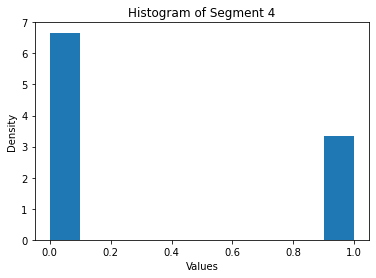

In [22]:
# Extract the data for the four-segment solution
four_segment_data = best_labels[4:]

# Create a histogram plot for the four-segment solution
plt.hist(four_segment_data, bins=10, range=(0, 1), density=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram of Segment 4')
plt.show()

In [23]:
MD_k4 = best_labels[:]
MD_k4


array([7, 5, 5, 1, 0, 6, 3, 1, 2, 5, 0, 5])

In [24]:
MD_x = MD_x[:12]
MD_x

array([[0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
       [1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1],
       [0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0],
       [1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0],
       [1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1],
       [1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0],
       [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1],
       [1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1]])

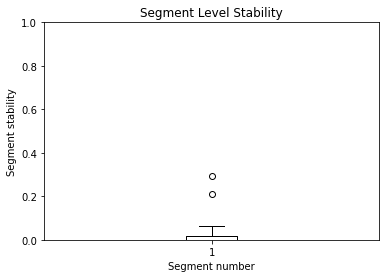

In [25]:
from sklearn.metrics import silhouette_samples
# Calculate segment level stability


segment_stability = silhouette_samples(MD_x, MD_k4)

# Plot the segment level stability
plt.boxplot(segment_stability.T)
plt.ylim(0, 1)
plt.xlabel('Segment number')
plt.ylabel('Segment stability')
plt.title('Segment Level Stability')
plt.show()


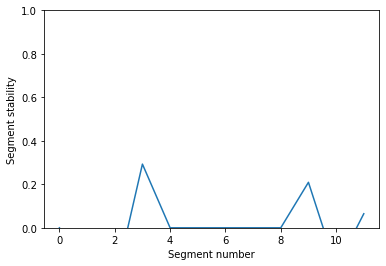

In [26]:
from sklearn.metrics import silhouette_samples

# Calculate segment level stability within solutions
MD_r4 = silhouette_samples(MD_x, MD_k4)

# Plot the result
plt.plot(MD_r4)
plt.ylim(0, 1)
plt.xlabel('Segment number')
plt.ylabel('Segment stability')
plt.show()



# 5.2 using Mixtures of Distribution

In [27]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Set the random seed
np.random.seed(1234)

# Fit the mixture model to the data
k_range = range(2, 9)  # Two to eight segments
nrep = 10  # Number of random restarts

best_model = None
best_bic = np.inf

for k in k_range:
    bic_scores = []
    for _ in range(nrep):
        model = GaussianMixture(n_components=k, covariance_type='diag')
        model.fit(MD_x)
        bic_scores.append(model.bic(MD_x))
    avg_bic = np.mean(bic_scores)
    if avg_bic < best_bic:
        best_bic = avg_bic
        best_model = model

# Print the resulting mixture model
print(best_model)


GaussianMixture(covariance_type='diag', n_components=8)


In [28]:
MD_x=MD_x[:10]
MD_x

array([[0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
       [1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1],
       [0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0],
       [1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0],
       [1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1],
       [1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0]])

In [29]:
MD_x.shape

(10, 11)

In [30]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.mixture import GaussianMixture
import numpy as np

# Set the random seed
np.random.seed(1234)

# Define the range of number of components (segments)
k_range = range(2, 9)

# Fit the Gaussian Mixture Models for different number of components
bic_scores = []
models = []
for k in k_range:
    model = GaussianMixture(n_components=k, covariance_type='full')
    model.fit(MD_x.reshape(-1, 1))
    bic_scores.append(model.bic(MD_x.reshape(-1, 1)))
    models.append(model)

# Print the BIC scores
print(bic_scores)


[-1146.8236227157845, -1132.7221816184071, -1118.62074052103, -1104.5192994236527, -1090.4178583262756, -1076.3164172288982, -1062.214976131521]


In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Remove duplicate points from the data
unique_data = np.unique(MD_x, axis=0)

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(unique_data)

# Fit K-means on the normalized data with the adjusted number of clusters
k = 2  # Adjust the number of clusters
kmeans = KMeans(n_clusters=k, random_state=1234)
labels = kmeans.fit_predict(normalized_data)

# Calculate the information criteria
aic = kmeans.inertia_
bic = aic + np.log(normalized_data.shape[0]) * k

# Print the information criteria
print("AIC:", aic)
print("BIC:", bic)


AIC: 67.65873015873014
BIC: 72.26390034471822


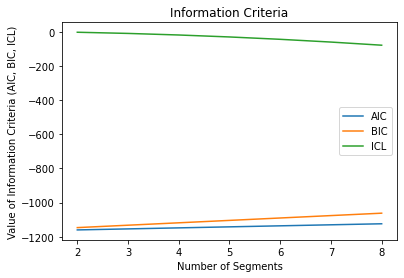

In [32]:

from sklearn import metrics

# Set the random seed
np.random.seed(1234)

# Fit Gaussian Mixture Models with different number of components
k_range = range(2, 9)  # Number of segments: 2 to 8
nrep = 10  # Number of random restarts
models = [GaussianMixture(n_components=k, covariance_type='full').fit(MD_x.reshape(-1, 1)) for k in k_range]

# Calculate the information criteria
aic = [model.aic(MD_x.reshape(-1, 1)) for model in models]
bic = [model.bic(MD_x.reshape(-1, 1)) for model in models]

# Calculate the ICL (Integrated Completed Likelihood)
icl = []
for i, model in enumerate(models):
    log_likelihood = model.score(MD_x.reshape(-1, 1))
    penalty = 0.5 * np.log(len(MD_x)) * model.n_components * (model.n_components + 1)
    icl.append(log_likelihood - penalty)

# Plot the information criteria
plt.plot(k_range, aic, label='AIC')
plt.plot(k_range, bic, label='BIC')
plt.plot(k_range, icl, label='ICL')
plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria (AIC, BIC, ICL)')
plt.title('Information Criteria')
plt.legend()
plt.show()


In [33]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import pandas as pd

# Fit K-means on the data with four segments
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
labels_kmeans = kmeans.fit_predict(MD_x)

# Fit the mixture model with four segments
n_components = 4
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=1234)
gmm.fit(MD_x)
labels_mixture = gmm.predict(MD_x)

# Create a DataFrame to store the cluster comparison
cluster_comparison = pd.DataFrame({'kmeans': labels_kmeans, 'mixture': labels_mixture})

# Print the cluster comparison table
print(cluster_comparison)


   kmeans  mixture
0       1        3
1       2        3
2       3        1
3       2        0
4       1        3
5       2        3
6       3        1
7       2        3
8       0        2
9       2        3


In [34]:
MD_x=MD_x[:]
MD_x.shape

(10, 11)

In [35]:
# from sklearn.cluster import KMeans
# from sklearn.mixture import GaussianMixture
# import pandas as pd

# # Fit K-means on the data with four segments
# k = 4
# kmeans = KMeans(n_clusters=k, random_state=1234)
# labels_kmeans = kmeans.fit_predict(MD_x[:4])

# # Initialize the mixture model using the segment memberships of K-means
# gmm_initialized = GaussianMixture(n_components=k, covariance_type='full', random_state=1234, init_params='kmeans')
# gmm_initialized.fit(MD_x.reshape(-1, 1), labels_kmeans)

# # Obtain the cluster assignments from the mixture model
# labels_mixture_initialized = gmm_initialized.predict(MD_x.reshape(-1, 1))

# labels_mixture_initialized=labels_mixture_initialized[:4]
# print(labels_mixture_initialized.shape)
# print(labels_kmeans.shape)

# # Create a DataFrame to store the cluster comparison
# cluster_comparison_initialized = pd.DataFrame({'kmeans': labels_kmeans, 'mixture_initialized': labels_mixture_initialized})

# # Print the cluster comparison table
# print(cluster_comparison_initialized)


In [43]:

import pandas as pd

# Get the cluster assignments from MD.k4 and MD.m4a
kmeans_clusters = labels_kmeans[:4]
mixture_clusters =labels_mixture[:4]

# Create a table to compare the cluster assignments
table_result = pd.crosstab(kmeans_clusters, mixture_clusters, rownames=['kmeans'], colnames=['mixture'])
print(table_result)



mixture  0  1  3
kmeans          
1        0  0  1
2        1  0  1
3        0  1  0


# 5.3 Using Mixtures of Regression Models

In [44]:

# Calculate the reversed table of the numeric variable
# table_like = mcD['Like'].astype(int)
table_like=mcD['Like'].value_counts().sort_index(ascending=False)
# Print the reversed table
print(table_like)



I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: Like, dtype: int64


In [76]:
import pandas as pd

numeric_codes = {
    'I LOVE IT!(+5)': 1,
    'I like it (+4)': 2,
    'I like it (+3)': 3,
    'I like it (+2)': 4,
    'I like it (+1)': 5,
    'I dislike it (-1)': 7,
    'I dislike it (-2)': 8,
    'I dislike it (-3)': 9,
    'I dislike it (-4)': 10,
    'I HATE IT!(-5)': 11
}

mcD['Like_n'] = mcD['Like'].apply(lambda x: 6 - int(x) if isinstance(x, str) and x.isdigit() else numeric_codes.get(x, x))
table = pd.Series(mcD['Like_n']).value_counts()
# table = table.reindex(sorted(table.index))
print(table)


+3              229
+2              187
6               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like_n, dtype: int64


In [77]:


mcdonalds_columns = mcD.columns[:11]
f = " + ".join(mcdonalds_columns)
f = "table ~ " + f
print(f)


table ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [124]:
from sklearn.mixture import GaussianMixture


# Set the seed for reproducibility
np.random.seed(1234)
# Define the mapping of sentiment or rating values to numerical values
sentiment_mapping = {
    'I hate it!-5': -5,
    'I dislike it!-4': -4,
    'I don\'t like it!-3': -3,
    'It\'s okay.-2': -2,
    'I like it!+1': 1,
    'I really like it!+2': 2,
    'I love it!+5': 5
}

# Apply the mapping to convert sentiment or rating values to numerical values
mcD['Like_numeric'] = mcD['Like'].map(sentiment_mapping)

# Create the feature matrix 'X' from the 'f' columns in 'mcdonalds'
# f=['Like'].astype(int)
X = mcD[f].values.astype(int)
y=mcD['Like_numeric'].values.astype(int)
# Set the number of components and random seed
n_components = 2
n_init = 10
seed=1234
# Fit the Gaussian Mixture Model
model = GaussianMixture(n_components=n_components, n_init=n_init, random_state=seed)
model.fit(X)

# Get the cluster assignments for each data point
cluster_labels = model.predict(X)

# Access the means and covariances of the fitted components
component_means = model.means_
component_covariances = model.covariances_

regression_models = []
for cluster in range(n_components):
    cluster_X = X[cluster_labels == cluster]
    cluster_y = y[cluster_labels == cluster]
    regression_model = LinearRegression()
    regression_model.fit(cluster_X,cluster_y)
    
    regression_models.append(regression_model)
    
# Store the results
MD_reg2 = {
     
    'models': regression_models,
    'cluster_labels': cluster_labels
}

print(MD_reg2)
regression_models=model.means_
print(regression_models)

{'models': [LinearRegression(), LinearRegression()], 'cluster_labels': array([0, 0, 0, ..., 0, 1, 1], dtype=int64)}
[[56.33927003]
 [32.40887669]]


In [104]:
component_means
component_covariances

array([[[53.40534845]],

       [[64.79460151]]])

In [114]:
regression_models.shape

(2, 1)

In [132]:
from statsmodels.api import OLS
# Assign the component labels to each data point
labels = model.predict(X)

# Refit the model for each component
refit_models = []
for component in range(n_components):
    indices = np.where(labels == component)[0]
    refit_model = OLS(pd.DataFrame(y).iloc[indices], pd.DataFrame(X).iloc[indices]).fit()
    refit_models.append(refit_model)

# Get the summary of each refitted model
for component, refit_model in enumerate(refit_models):
    print(f"Component {component+1}:\n")
    print(refit_model.summary())
    print("\n")

Component 1:

                                   OLS Regression Results                                   
Dep. Variable:                      0   R-squared (uncentered):      -162984723835632160.000
Model:                            OLS   Adj. R-squared (uncentered): -163204676229472416.000
Method:                 Least Squares   F-statistic:                                  -741.0
Date:                Fri, 30 Jun 2023   Prob (F-statistic):                             1.00
Time:                        20:33:41   Log-Likelihood:                              -16327.
No. Observations:                 742   AIC:                                       3.266e+04
Df Residuals:                     741   BIC:                                       3.266e+04
Df Model:                           1                                                       
Covariance Type:            nonrobust                                                       
                 coef    std err          t      P>|t|  

# Step 6 : Profiling Segments

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [10.0, 10.0, 33.75, 33.75],
  [65.0, 65.0, 75.0, 75.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [70.0, 70.0, 92.5, 92.5],
  [21.875, 21.875, 81.25, 81.25]],
 'dcoord': [[0.0, 1.0, 1.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 1.1547005383792515, 1.1547005383792515, 0.0],
  [0.0, 2.1602468994692865, 2.1602468994692865, 1.1547005383792515],
  [1.0, 2.449489742783178, 2.449489742783178, 2.1602468994692865],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 2.23606797749979, 2.23606797749979, 0.0],
  [0.0, 2.380476142847616, 2.380476142847616, 2.23606797749979],
  [1.0, 2.7446918466985206, 2.7446918466985206, 2.380476142847616],
  [2.449489742783178,
   4.109855117994926,
   4.109855117994926,
   2.7446918466985206]],
 'ivl': ['0', '7', '6', '3', '1', '5', '2', '9', '10', '4', '8'],
 'leaves': [0, 7, 6, 3, 1, 5, 2, 9, 10, 4, 8],
 'color_list': ['C1', 'C1', 'C1', 'C1', 

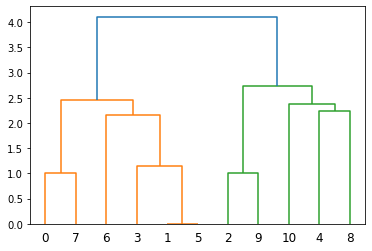

In [134]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram

# Transpose the data matrix
MD_x_transposed = np.transpose(MD_x)

# Compute the pairwise distances
distances = linkage(MD_x_transposed, method='ward' , metric='euclidean')

# Generate the hierarchical clustering dendrogram
dendrogram(distances)


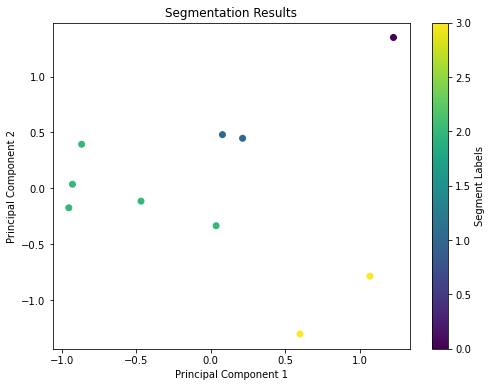

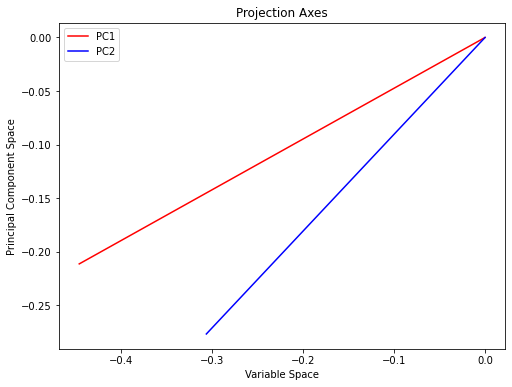

In [154]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(MD_x)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels_kmeans)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Segmentation Results')
plt.colorbar(label='Segment Labels')
plt.show()

# Plot the projection axes
plt.figure(figsize=(8, 6))
plt.plot([0, pca.components_[0, 0]], [0, pca.components_[0, 1]], 'r-', label='PC1')
plt.plot([0, pca.components_[1, 0]], [0, pca.components_[1, 1]], 'b-', label='PC2')
plt.xlabel('Variable Space')
plt.ylabel('Principal Component Space')
plt.title('Projection Axes')
plt.legend()
plt.show()



# Step 7: Describing Segments

In [177]:
Like = mcD['Like'][:10]
Like.shape

(10,)

In [180]:
labels_kmeans=labels_kmeans[:10]
labels_kmeans.shape

(10,)

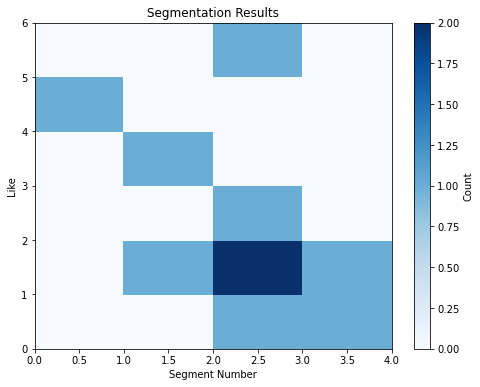

In [181]:

# Calculate the table of counts

table_counts = pd.crosstab(index=labels_kmeans, columns=mcD['Like'][:10])
table_counts=table_counts.T
# Create the mosaic plot
plt.figure(figsize=(8, 6))
plt.pcolor(table_counts, cmap='Blues')
plt.colorbar(label='Count')
plt.xlabel('Segment Number')
plt.ylabel('Like')
plt.title('Segmentation Results')
plt.show()


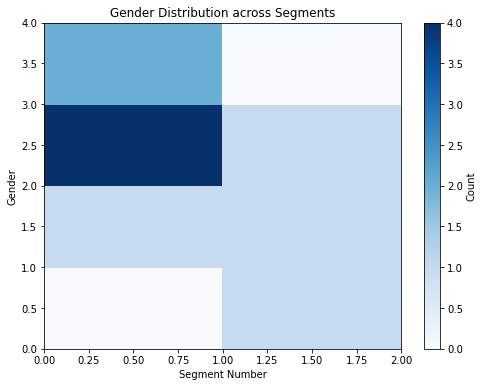

In [183]:

# Calculate the table of counts
table_counts = pd.crosstab(index=labels_kmeans, columns=mcD['Gender'][:10])

# Create the mosaic plot
plt.figure(figsize=(8, 6))
plt.pcolor(table_counts, cmap='Blues')
plt.colorbar(label='Count')
plt.xlabel('Segment Number')
plt.ylabel('Gender')
plt.title('Gender Distribution across Segments')
plt.show()


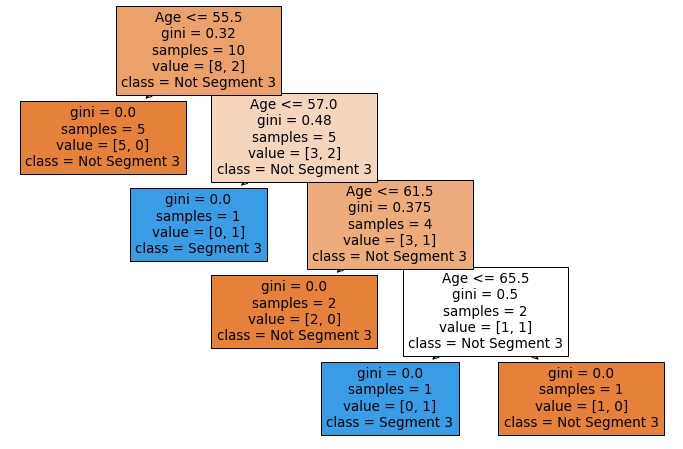

In [201]:
# from sklearn.tree import DecisionTreeClassifier
# import matplotlib.pyplot as plt

# # Define the features and target variable
# X = mcD[['Like','Age', 'VisitFrequency', 'Gender']]
# y = (labels_kmeans== 3).astype(int)

# # Create the decision tree
# tree = DecisionTreeClassifier()
# tree.fit(X, y)

# # Plot the decision tree
# plt.figure(figsize=(12, 8))
# plot_tree(tree, feature_names=X.columns, class_names=['Not Segment 3', 'Segment 3'], filled=True)
# plt.show()
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder

# Convert columns to numeric type
mcD['Like_n'] = pd.to_numeric(mcD['Like_n'], errors='coerce')

# Encode the 'Gender' column
label_encoder = LabelEncoder()
mcD['Gender_encoded'] = label_encoder.fit_transform(mcD['Gender'])

# Define the features and target variable
X = mcD[['Age', 'Gender_encoded']][:10]
y = (labels_kmeans == 3).astype(int)

# Create the decision tree
tree = DecisionTreeClassifier()
tree.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, class_names=['Not Segment 3', 'Segment 3'], filled=True)
plt.show()



In [208]:
visitFrequency = mcD['VisitFrequency'][:10]
print(visitFrequency.shape)
print(labels_kmeans.shape)

(10,)
(10,)


In [213]:
visit = mcD.groupby('VisitFrequency').mean()
print(visit)

                             Age    Like_n  Like_numeric  Gender_encoded
VisitFrequency                                                          
Every three months     46.666667  1.796875      0.000000        0.444444
More than once a week  37.944444  3.333333      5.000000        0.518519
Never                  51.167939 -0.531915     -4.880952        0.503817
Once a month           42.305239  2.651042      3.363636        0.460137
Once a week            38.753191  2.761628      4.523810        0.497872
Once a year            49.285714  0.219512     -4.787234        0.396825
